
# Boston Housing Analysis

## Project Scenario
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

## Overview of Project Tasks
### Task 1: Familiarize yourself with the dataset
### Task 2: Generate basic statistics and visualizations for upper management
### Task 3: Use the appropriate tests to answer the questions provided
### Task 4: Share your Jupyter Notebook

## Task 1: Familiarize yourself with the dataset


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



## Task 2: Generate basic statistics and visualizations for upper management

### Boxplot for the "Median value of owner-occupied homes" (MEDV)


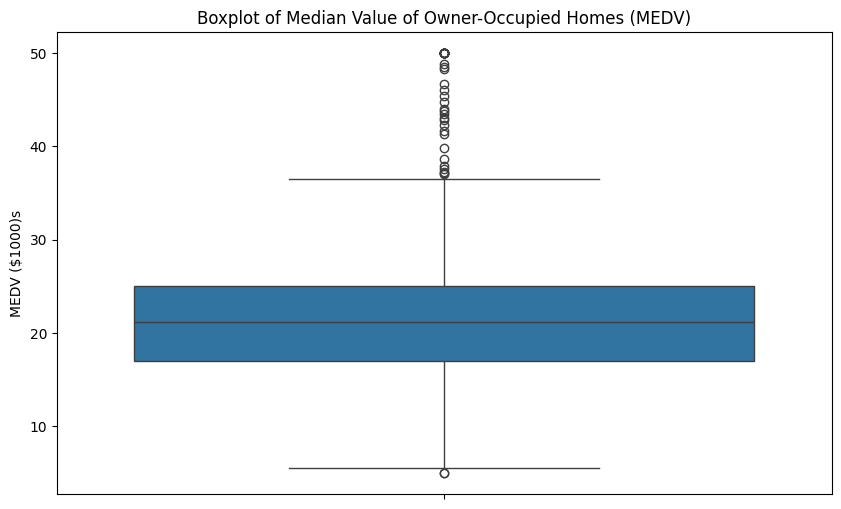

In [3]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['medv'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000)s')
plt.show()



### Bar plot for the Charles river variable (CHAS)


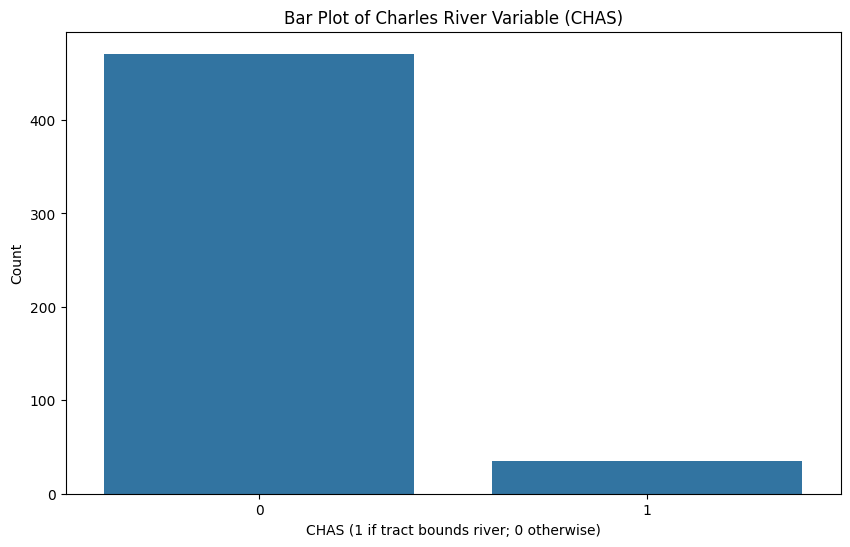

In [4]:

plt.figure(figsize=(10, 6))
sns.countplot(x=df['chas'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()



### Boxplot for MEDV vs AGE groups


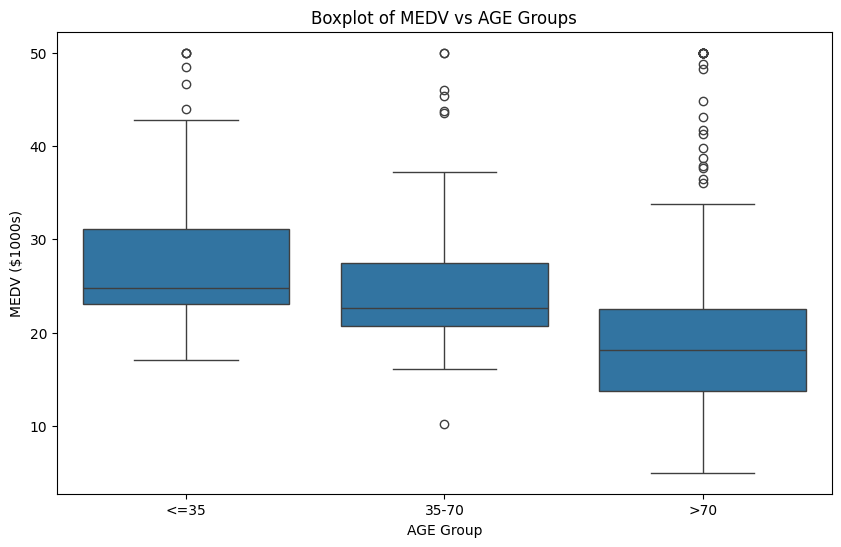

In [6]:

df['age_group'] = pd.cut(df['age'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age_group'], y=df['medv'])
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000s)')
plt.show()



### Scatter plot of NOX vs INDUS


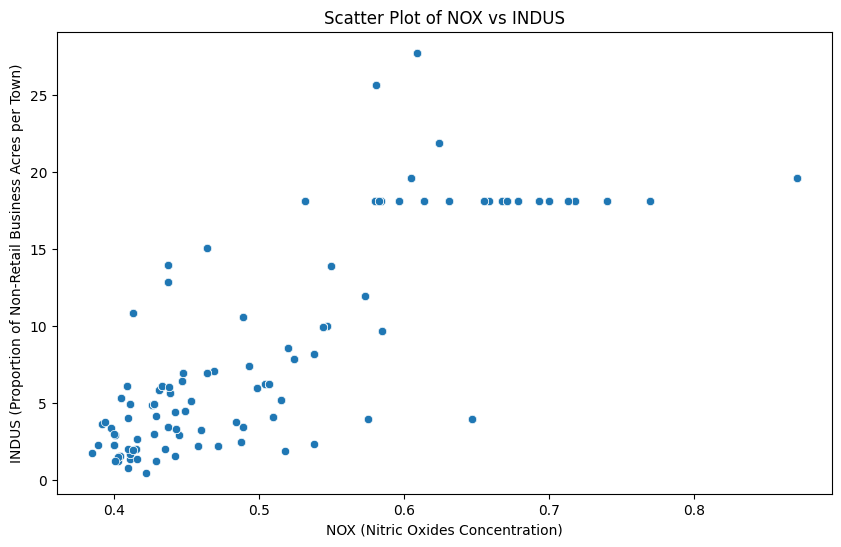

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['nox'], y=df['indus'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('INDUS (Proportion of Non-Retail Business Acres per Town)')
plt.show()



### Histogram for the pupil to teacher ratio variable (PTRATIO)


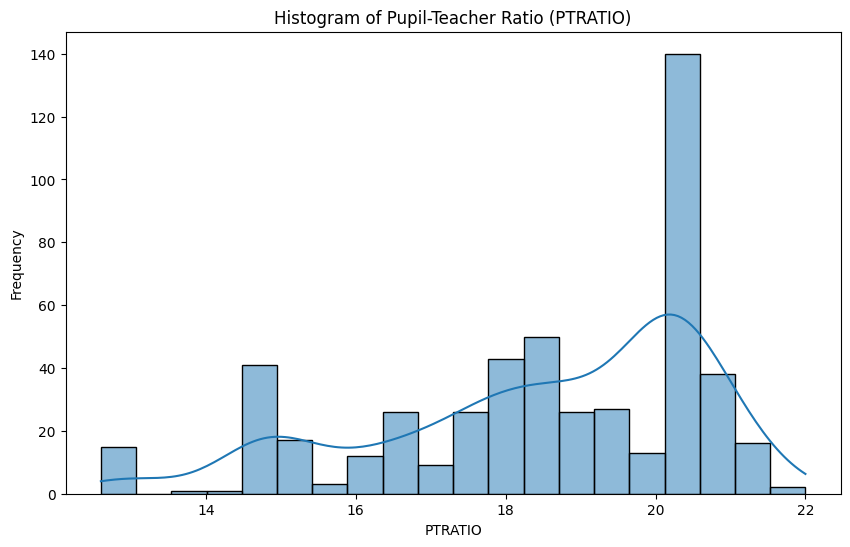

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['ptratio'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()



## Task 3: Use the appropriate tests to answer the questions provided

### T-test for independent samples (CHAS vs MEDV)


In [9]:

chas_0 = df[df['chas'] == 0]['medv']
chas_1 = df[df['chas'] == 1]['medv']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print(f"T-test for CHAS vs MEDV: t-statistic = {t_stat}, p-value = {p_value}")


T-test for CHAS vs MEDV: t-statistic = -3.996437466090509, p-value = 7.390623170519905e-05



### ANOVA for AGE groups vs MEDV


In [10]:

anova_result = stats.f_oneway(df[df['age_group'] == '<=35']['medv'],
                              df[df['age_group'] == '35-70']['medv'],
                              df[df['age_group'] == '>70']['medv'])
print(f"ANOVA for AGE groups vs MEDV: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA for AGE groups vs MEDV: F-statistic = 36.40764999196599, p-value = 1.7105011022702984e-15



### Pearson correlation between NOX and INDUS


In [11]:

pearson_corr, pearson_p_value = stats.pearsonr(df['nox'], df['indus'])
print(f"Pearson correlation between NOX and INDUS: correlation coefficient = {pearson_corr}, p-value = {pearson_p_value}")


Pearson correlation between NOX and INDUS: correlation coefficient = 0.763651446920915, p-value = 7.913361061241532e-98



### Regression analysis (DIS on MEDV)


In [12]:

X = df[['dis']]
y = df['medv']
regression_model = LinearRegression()
regression_model.fit(X, y)
regression_coef = regression_model.coef_[0]
regression_intercept = regression_model.intercept_
print(f"Regression analysis (DIS on MEDV): coefficient = {regression_coef}, intercept = {regression_intercept}")


Regression analysis (DIS on MEDV): coefficient = 1.0916130158411088, intercept = 18.390088330493388
